In [1]:
import numpy as np
import mtd
import pycatch22

from torch.utils.data import DataLoader
from aeon.datasets import load_basic_motions, load_italy_power_demand

import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
from aeon.datasets import load_classification

In [3]:
X_train, y_train = load_classification("WormsTwoClass", split = "Train")

X_test, y_test = load_classification("WormsTwoClass", split = "Test")

In [4]:
X_train.shape

(181, 1, 900)

In [5]:
X_test.shape

(77, 1, 900)

https://www.timeseriesclassification.com/description.php?Dataset=WormsTwoClass

We have 257 cases, which we split 70\%/30\% into a train and test set. Each series has 900 observations, and each worm is classified as either wild-type or one of four mutant types

In [ ]:
# get the index corresponding to the first pure noise time series
first_idx = np.argmin(y_train)
# get the index corresponding to the first noise + gravitational wave time series
second_idx = np.argmax(y_train)

ts_first = X_train[first_idx]
ts_second = X_train[second_idx]


fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=list(range(len(ts_first[0]))), y=ts_first[0], mode="lines", name="first class"),
    row=1,
    col=1,
)

fig.add_trace(
    go.Scatter(
        x=list(range(len(ts_second[0]))),
        y=ts_second[0],
        mode="lines",
        name="second class",
    ),
    row=1,
    col=2,
)
fig.show()

---
## Let's generate topological features

In [19]:
# from scipy.stats import entropy
# from gtda.time_series import TakensEmbedding
# from sklearn.decomposition import PCA
# import mtd
# from scipy.stats import entropy

# def my_entropy(cross_barcodes, normalize = False):
#     pers_entropy = np.zeros((len(cross_barcodes),2))

#     sum_lifespan = np.zeros(len(cross_barcodes))

    
#     for barcode_idx in range(len(cross_barcodes)):
#         for hom_dim in [0, 1]:
#             lifespan_sums = cross_barcodes[barcode_idx][hom_dim][:, 1] - cross_barcodes[barcode_idx][hom_dim][:, 0]
#             sum_lifespan[barcode_idx] += np.sum(lifespan_sums)

            
#             entropy_dim = entropy(lifespan_sums, base = 2)
            
#             pers_entropy[barcode_idx][hom_dim] = entropy_dim

#     if normalize:
#         pers_entropy /= np.log2(sum_lifespan[...,None])
        
#     return pers_entropy

# embedding_dimension = 100
# embedding_time_delay = 5
# stride = 5

# embedder = TakensEmbedding(time_delay=embedding_time_delay,
#                            dimension=embedding_dimension,
#                            stride=stride)

# batch_pca = PCA(n_components=3)

# persistence = mtd.calc_cross_barcodes 

---

In [20]:
# features_train = np.array(embedder.fit_transform(X_train))

# features_train = [batch_pca.fit_transform(cloud) for cloud in features_train]

In [21]:
# features_test= np.array(embedder.fit_transform(X_test))

# features_test = [batch_pca.fit_transform(cloud) for cloud in features_test]

### Here we can optimise choice of representatives from both class, now I take two random=)

In [22]:
first_represent = features_train[first_idx]
second_represent = features_train[second_idx]

del features_train[first_idx]
del features_train[second_idx-1]

In [23]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_train):
    cross_barcodes.append(persistence(first_represent , cloud, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_first = my_entropy(cross_barcodes, normalize=False)
mtd_first = [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:04<00:00, 37.76it/s]


In [24]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_train):
    cross_barcodes.append(persistence(cloud, first_represent, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_first_rw = my_entropy(cross_barcodes, normalize=False)
mtd_first_rw= [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:03<00:00, 58.38it/s]


In [25]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_train):
    cross_barcodes.append(persistence(second_represent , cloud, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_second = my_entropy(cross_barcodes, normalize=False)
mtd_second = [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:03<00:00, 52.80it/s]


In [26]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_train):
    cross_barcodes.append(persistence(cloud, second_represent, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_second_rw = my_entropy(cross_barcodes, normalize=False)
mtd_second_rw= [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:03<00:00, 59.11it/s]


In [27]:
mtd_first = np.array(mtd_first).reshape(-1,1)
mtd_first_rw = np.array(mtd_first_rw).reshape(-1,1)
mtd_second = np.array(mtd_second).reshape(-1,1)
mtd_second_rw = np.array(mtd_second_rw).reshape(-1,1)

In [28]:
mtds = np.concatenate([mtd_first, mtd_first_rw,
                            mtd_second, mtd_second_rw,
                           ], axis = 1)

In [29]:
entropyes = np.concatenate([entropyes_first, entropyes_first_rw,
                            entropyes_second, entropyes_second_rw
                           ], axis = 1)

In [30]:
entropyes_first_rw.shape

(179, 2)

In [31]:
topological_features_train = np.concatenate([entropyes, mtds],axis = 1)

In [32]:
topological_features_train.shape

(179, 12)

---

In [33]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_test):
    cross_barcodes.append(persistence(first_represent , cloud, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_first = my_entropy(cross_barcodes, normalize=False)
mtd_first = [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:01<00:00, 45.74it/s]


In [34]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_test):
    cross_barcodes.append(persistence(cloud, first_represent, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_first_rw = my_entropy(cross_barcodes, normalize=False)
mtd_first_rw= [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:02<00:00, 36.42it/s]


In [35]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_test):
    cross_barcodes.append(persistence(second_represent , cloud, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_second = my_entropy(cross_barcodes, normalize=False)
mtd_second = [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:02<00:00, 38.35it/s]


In [54]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_test):
    cross_barcodes.append(persistence(cloud, second_represent, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_second_rw = my_entropy(cross_barcodes, normalize=False)
mtd_second_rw= [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:01<00:00, 51.73it/s]


In [57]:
np.array(mtd_second_rw).reshape(-1,1).shape

(77, 1)

In [37]:
mtd_first = np.array(mtd_first).reshape(-1,1)
mtd_first_rw = np.array(mtd_first_rw).reshape(-1,1)
mtd_second = np.array(mtd_second).reshape(-1,1)
mtd_second_rw = np.array(mtd_second_rw).reshape(-1,1)

In [38]:
mtds = np.concatenate([mtd_first, mtd_first_rw,
                            mtd_second, mtd_second_rw,
                           ], axis = 1)

In [39]:
entropyes = np.concatenate([entropyes_first, entropyes_first_rw,
                            entropyes_second, entropyes_second_rw
                           ], axis = 1)

In [40]:
topological_features_test = np.concatenate([entropyes, mtds],axis = 1)
topological_features_test.shape

(77, 12)

---

In [30]:
from Topological_classifier import TopologicalFeatureGenerator
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

# classificator = xgb.XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.1)
classificator = RandomForestClassifier(random_state=42, n_estimators = 1000)


top_gen = TopologicalFeatureGenerator(representatives= X_train[[first_idx, second_idx]])

X_train_new = np.delete(X_train,[first_idx, second_idx], axis = 0)
y_train_new = np.delete(y_train,[first_idx, second_idx], axis = 0).astype(int)

pipe_top = make_pipeline(
    top_gen,
    classificator
)

https://www.aeon-toolkit.org/en/stable/getting_started.html#time-series-classification-tsc

In [31]:
from aeon.transformations.collection.feature_based import Catch22
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.metrics import accuracy_score

# X_train_new = np.delete(X_train,[first_idx, second_idx], axis = 0)
# y_train_new = np.delete(y_train,[first_idx, second_idx], axis = 0)
# Create and fit the pipeline

pipe_catch = make_pipeline(
    Catch22(replace_nans=True),
    classificator
)

catch = Catch22(replace_nans=True)

X_train_catch= catch.fit_transform(X_train_new)

In [32]:
X_test_catch = catch.transform(X_test)

In [33]:
combined_features = FeatureUnion([("top_gen", top_gen), ("catch", Catch22(replace_nans=True))])

pipe_catch_topgen = make_pipeline(
    combined_features,
    classificator
)

---
#### Catch22 results

In [34]:
Randomforest = RandomForestClassifier(random_state=42)

In [35]:
pipe_catch.fit(X_train_new,y_train_new-1)
accuracy_score(pipe_catch.predict(X_test), y_test.astype(int)-1)

0.8441558441558441

---
### Topology based features results 

In [36]:
# Randomforest.fit(topological_features_train, y_train_new)
# accuracy_score(Randomforest.predict(topological_features_test), y_test)

In [37]:
pipe_top.fit(X_train_new, y_train_new-1)
accuracy_score(pipe_top.predict(X_test), y_test.astype(int)-1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.53s/it]


0.7532467532467533

---
### Topology+Catch22 results

In [38]:
# Randomforest.fit(np.concatenate([topological_features_train, X_train_catch], axis = 1), y_train_new)
# accuracy_score(Randomforest.predict(np.concatenate([topological_features_test, X_test_catch], axis = 1)), y_test)

In [39]:
pipe_catch_topgen.fit(X_train_new,y_train_new-1)
accuracy_score(pipe_catch_topgen.predict(X_test), y_test.astype(int)-1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.49s/it]


0.8441558441558441

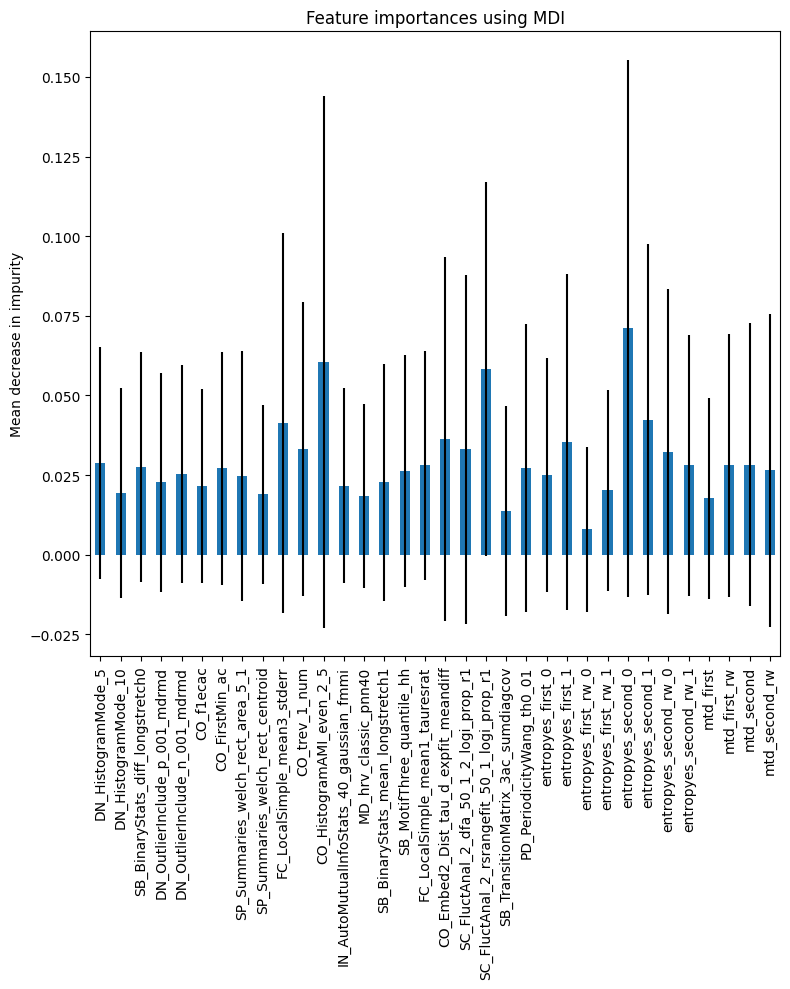

In [40]:
feature_names = catch.get_features_arguments + top_gen.get_feature_names_out(1)

importances = pipe_catch_topgen["randomforestclassifier"].feature_importances_

std = np.std([tree.feature_importances_ for tree in pipe_catch_topgen["randomforestclassifier"].estimators_], axis=0)

import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize = (8,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

---

In [50]:
X_train_new = np.delete(X_train,[first_idx, second_idx], axis = 0)
y_train_new = np.delete(y_train,[first_idx, second_idx], axis = 0).astype(int)

classificator = RandomForestClassifier(random_state=42, n_estimators = 1000)

X_train_comb = combined_features.fit_transform(X_train_new, y_train_new-1)

classificator.fit(X_train_comb, y_train_new-1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.56s/it]


RandomForestClassifier(n_estimators=1000, random_state=42)

In [51]:
X_test_comb = combined_features.fit_transform(X_test, y_test.astype(int)-1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.60s/it]


In [53]:
from sklearn.inspection import permutation_importance
import time
start_time = time.time()
result = permutation_importance(
    classificator, X_test_comb,  y_test.astype(int)-1, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 24.250 seconds


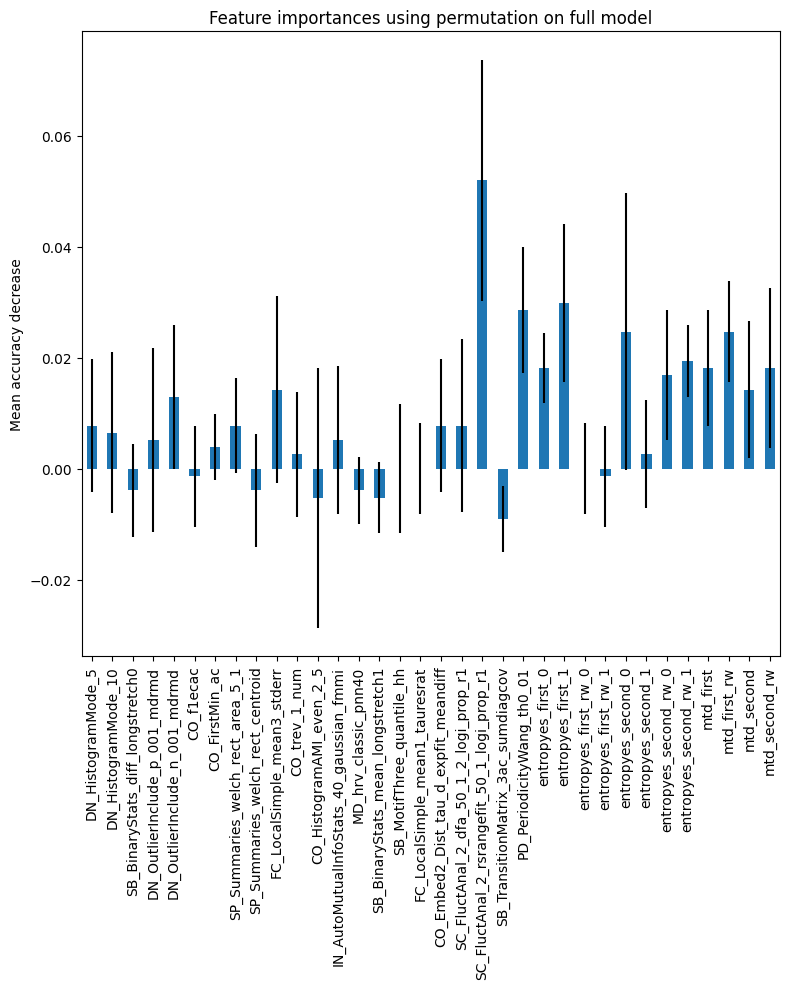

In [54]:
fig, ax = plt.subplots(figsize = (8,10))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

more timeseries

ICML ICLR поискать по tsc взять модель оттуда за бейзлайн

посчитать std 

сделать удобный пайплайн для тестирования на разных датасетх, нужно определиться с базовой моделью и может в качестве топологических фичей добавить просто баркоды и mtd одномерных гомологий

### Let's add four additional datasets for this task and comare results of algorithms

In [3]:
from Topological_classifier import TopologicalFeatureGenerator
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from aeon.transformations.collection.feature_based import Catch22
from tsml_eval.experiments import run_classification_experiment

dataset = "Computers"

X_train, y_train = load_classification(dataset, split = "Train")

X_test, y_test = load_classification(dataset, split = "Test")

# get the index corresponding to the first pure noise time series
first_idx = np.argmin(y_train)
# get the index corresponding to the first noise + gravitational wave time series
second_idx = np.argmax(y_train)



# classificator = xgb.XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.1)
classificator = RandomForestClassifier(random_state=42, n_estimators = 1000)

top_gen = TopologicalFeatureGenerator(
                    embedding_dimension = 150,
                    embedding_time_delay = 4,
                    stride = 3,
                    n_components = 40,
                    representatives= X_train[[first_idx, second_idx]])


combined_features = FeatureUnion([("top_gen", top_gen), ("catch", Catch22(replace_nans=True))])

pipe_catch_topgen = make_pipeline(
    combined_features,
    classificator
)

pipe_catch = make_pipeline(
    Catch22(replace_nans=True),
    classificator
)

pipe_top = make_pipeline(
    top_gen,
    classificator
)

X_train_new = np.delete(X_train,[first_idx, second_idx], axis = 0)
y_train_new = np.delete(y_train,[first_idx, second_idx], axis = 0).astype(int)
# The directory to write the results file to

pipe_catch.fit(X_train_new,y_train_new-1)
catch_res = accuracy_score(pipe_catch.predict(X_test), y_test.astype(int)-1)

pipe_top.fit(X_train_new,y_train_new-1)
top_res = accuracy_score(pipe_top.predict(X_test), y_test.astype(int)-1)

pipe_catch_topgen.fit(X_train_new,y_train_new-1)
catch_top_res = accuracy_score(pipe_catch_topgen.predict(X_test), y_test.astype(int)-1)

print(f"Dataset: {dataset}")
print(f"CATCH22 results: {catch_res}")
print(f"TopGen results: {top_res}")
print(f"CATCH22+TopGen results: {catch_top_res}")

Optimal time delay based on mutual information: 4
Optimal embedding dimension based on false nearest neighbors: 4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.61s/it]


Dataset: Computers
CATCH22 results: 0.728
TopGen results: 0.568
CATCH22+TopGen results: 0.72


In [4]:
dataset = "Earthquakes"

X_train, y_train = load_classification(dataset, split = "Train")

X_test, y_test = load_classification(dataset, split = "Test")

# get the index corresponding to the first pure noise time series
first_idx = np.argmin(y_train)
# get the index corresponding to the first noise + gravitational wave time series
second_idx = np.argmax(y_train)



# classificator = xgb.XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.1)
classificator = RandomForestClassifier(random_state=42, n_estimators = 1000)

top_gen = TopologicalFeatureGenerator(
                    embedding_dimension = 100,
                    embedding_time_delay = 4,
                    stride = 3,
                    n_components = 40,
                    representatives= X_train[[first_idx, second_idx]])


combined_features = FeatureUnion([("top_gen", top_gen), ("catch", Catch22(replace_nans=True))])

pipe_catch_topgen = make_pipeline(
    combined_features,
    classificator
)

pipe_catch = make_pipeline(
    Catch22(replace_nans=True),
    classificator
)

pipe_top = make_pipeline(
    top_gen,
    classificator
)

X_train_new = np.delete(X_train,[first_idx, second_idx], axis = 0)
y_train_new = np.delete(y_train,[first_idx, second_idx], axis = 0).astype(int)
# The directory to write the results file to

pipe_catch.fit(X_train_new,y_train_new-1)
catch_res = accuracy_score(pipe_catch.predict(X_test), y_test.astype(int)-1)

pipe_top.fit(X_train_new,y_train_new-1)
top_res = accuracy_score(pipe_top.predict(X_test), y_test.astype(int)-1)

pipe_catch_topgen.fit(X_train_new,y_train_new-1)
catch_top_res = accuracy_score(pipe_catch_topgen.predict(X_test), y_test.astype(int)-1)

print(f"Dataset: {dataset}")
print(f"CATCH22 results: {catch_res}")
print(f"TopGen results: {top_res}")
print(f"CATCH22+TopGen results: {catch_top_res}")

Optimal time delay based on mutual information: 1
Optimal embedding dimension based on false nearest neighbors: 15


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.38s/it]


Dataset: Earthquakes
CATCH22 results: 0.7410071942446043
TopGen results: 0.7410071942446043
CATCH22+TopGen results: 0.7482014388489209


In [ ]:
dataset = "FordA"

X_train, y_train = load_classification(dataset, split = "Train")

X_test, y_test = load_classification(dataset, split = "Test")

# get the index corresponding to the first pure noise time series
first_idx = np.argmin(y_train)
# get the index corresponding to the first noise + gravitational wave time series
second_idx = np.argmax(y_train)



# classificator = xgb.XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.1)
classificator = RandomForestClassifier(random_state=42, n_estimators = 1000)

top_gen = TopologicalFeatureGenerator(
                    embedding_dimension = 100,
                    embedding_time_delay = 4,
                    stride = 3,
                    n_components = 40,
                    representatives= X_train[[first_idx, second_idx]])


combined_features = FeatureUnion([("top_gen", top_gen), ("catch", Catch22(replace_nans=True))])

pipe_catch_topgen = make_pipeline(
    combined_features,
    classificator
)

pipe_catch = make_pipeline(
    Catch22(replace_nans=True),
    classificator
)

pipe_top = make_pipeline(
    top_gen,
    classificator
)

X_train_new = np.delete(X_train,[first_idx, second_idx], axis = 0)
y_train_new = np.delete(y_train,[first_idx, second_idx], axis = 0).astype(int)
# The directory to write the results file to

pipe_catch.fit(X_train_new,y_train_new-1)
catch_res = accuracy_score(pipe_catch.predict(X_test), y_test.astype(int)-1)

pipe_top.fit(X_train_new,y_train_new-1)
top_res = accuracy_score(pipe_top.predict(X_test), y_test.astype(int)-1)

pipe_catch_topgen.fit(X_train_new,y_train_new-1)
catch_top_res = accuracy_score(pipe_catch_topgen.predict(X_test), y_test.astype(int)-1)

print(f"Dataset: {dataset}")
print(f"CATCH22 results: {catch_res}")
print(f"TopGen results: {top_res}")
print(f"CATCH22+TopGen results: {catch_top_res}")

In [21]:
dataset = "Strawberry"

X_train, y_train = load_classification(dataset, split = "Train")

X_test, y_test = load_classification(dataset, split = "Test")

# get the index corresponding to the first pure noise time series
first_idx = np.argmin(y_train)
# get the index corresponding to the first noise + gravitational wave time series
second_idx = np.argmax(y_train)



# classificator = xgb.XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.1)
classificator = RandomForestClassifier(random_state=42, n_estimators = 1000)

top_gen = TopologicalFeatureGenerator(
                    embedding_dimension = 50,
                    embedding_time_delay = 4,
                    stride = 5,
                    n_components = 10,
                    representatives= X_train[[first_idx, second_idx]])


combined_features = FeatureUnion([("top_gen", top_gen), ("catch", Catch22(replace_nans=True))])

pipe_catch_topgen = make_pipeline(
    combined_features,
    classificator
)

pipe_catch = make_pipeline(
    Catch22(replace_nans=True),
    classificator
)

pipe_top = make_pipeline(
    top_gen,
    classificator
)

X_train_new = np.delete(X_train,[first_idx, second_idx], axis = 0)
y_train_new = np.delete(y_train,[first_idx, second_idx], axis = 0).astype(int)
# The directory to write the results file to

pipe_catch.fit(X_train_new,y_train_new-1)
catch_res = accuracy_score(pipe_catch.predict(X_test), y_test.astype(int)-1)

pipe_top.fit(X_train_new,y_train_new-1)
top_res = accuracy_score(pipe_top.predict(X_test), y_test.astype(int)-1)

pipe_catch_topgen.fit(X_train_new,y_train_new-1)
catch_top_res = accuracy_score(pipe_catch_topgen.predict(X_test), y_test.astype(int)-1)

print(f"Dataset: {dataset}")
print(f"CATCH22 results: {catch_res}")
print(f"TopGen results: {top_res}")
print(f"CATCH22+TopGen results: {catch_top_res}")

Optimal time delay based on mutual information: 4
Optimal embedding dimension based on false nearest neighbors: 5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.99s/it]


Dataset: Strawberry
CATCH22 results: 0.9378378378378378
TopGen results: 0.8702702702702703
CATCH22+TopGen results: 0.9405405405405406


In [36]:
from Topological_classifier import TopologicalFeatureGenerator
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from aeon.transformations.collection.feature_based import Catch22
from tsml_eval.experiments import run_classification_experiment

datasets = ["Computers", "Earthquakes", "FordA", "Ham", "Strawberry", "Wafer", "Wine", "Yoga", "FreezerRegularTrain"]

for dataset in datasets:
    X_train, y_train = load_classification(dataset, split = "Train")
    
    X_test, y_test = load_classification(dataset, split = "Test")
    
    # get the index corresponding to the first pure noise time series
    first_idx = np.argmin(y_train)
    # get the index corresponding to the first noise + gravitational wave time series
    second_idx = np.argmax(y_train)
    
    
    
    # classificator = xgb.XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.1)
    classificator = RandomForestClassifier(random_state=42, n_estimators = 1000)
    
    top_gen = TopologicalFeatureGenerator(
                        embedding_dimension = 20,
                        embedding_time_delay = 4,
                        stride = 5,
                        n_components = 10,
                        representatives= X_train[[first_idx, second_idx]])
    
    
    combined_features = FeatureUnion([("top_gen", top_gen), ("catch", Catch22(replace_nans=True))])
    
    pipe_catch_topgen = make_pipeline(
        combined_features,
        classificator
    )
    
    pipe_catch = make_pipeline(
        Catch22(replace_nans=True),
        classificator
    )
    
    pipe_top = make_pipeline(
        top_gen,
        classificator
    )
    
    X_train_new = np.delete(X_train,[first_idx, second_idx], axis = 0)
    y_train_new = np.delete(y_train,[first_idx, second_idx], axis = 0).astype(int)
    # The directory to write the results file to
    
    pipe_catch.fit(X_train_new,y_train_new-1)
    catch_res = accuracy_score(pipe_catch.predict(X_test), y_test.astype(int)-1)
    
    pipe_top.fit(X_train_new,y_train_new-1)
    top_res = accuracy_score(pipe_top.predict(X_test), y_test.astype(int)-1)
    
    pipe_catch_topgen.fit(X_train_new,y_train_new-1)
    catch_top_res = accuracy_score(pipe_catch_topgen.predict(X_test), y_test.astype(int)-1)
    
    print(f"Dataset: {dataset}")
    print(f"CATCH22 results: {catch_res}")
    print(f"TopGen results: {top_res}")
    print(f"CATCH22+TopGen results: {catch_top_res}")

Optimal time delay based on mutual information: 4
Optimal embedding dimension based on false nearest neighbors: 3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:11<00:00, 17.84s/it]


Dataset: Computers
CATCH22 results: 0.728
TopGen results: 0.628
CATCH22+TopGen results: 0.716
Optimal time delay based on mutual information: 1
Optimal embedding dimension based on false nearest neighbors: 14


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.14s/it]


Dataset: Earthquakes
CATCH22 results: 0.7410071942446043
TopGen results: 0.7482014388489209
CATCH22+TopGen results: 0.7482014388489209
Optimal time delay based on mutual information: 3
Optimal embedding dimension based on false nearest neighbors: 5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:45<00:00, 41.36s/it]


Dataset: FordA
CATCH22 results: 0.9143939393939394
TopGen results: 0.6537878787878788
CATCH22+TopGen results: 0.9106060606060606
Optimal time delay based on mutual information: 4
Optimal embedding dimension based on false nearest neighbors: 6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.71s/it]


Dataset: Ham
CATCH22 results: 0.6190476190476191
TopGen results: 0.5619047619047619
CATCH22+TopGen results: 0.6666666666666666
Optimal time delay based on mutual information: 4
Optimal embedding dimension based on false nearest neighbors: 5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.54s/it]


Dataset: Strawberry
CATCH22 results: 0.9378378378378378
TopGen results: 0.8486486486486486
CATCH22+TopGen results: 0.9297297297297298
Optimal time delay based on mutual information: 4
Optimal embedding dimension based on false nearest neighbors: 5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:37<00:00, 54.47s/it]


Dataset: Wafer
CATCH22 results: 0.9978909798831928
TopGen results: 0.9099610642439974
CATCH22+TopGen results: 0.9974042829331603


URLError: <urlopen error [Errno 110] Connection timed out>